In [1]:
import ee
import geemap
from geemap import ml
from sklearn import ensemble
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializa la autenticación y la inicialización de Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-facuboladerasgee')

In [74]:
# import os

# def combine_csv_files(folder_path):
#     # Lista para almacenar todos los DataFrames
#     df_list = []
    
#     # Recorrer todos los archivos en la carpeta
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".csv"):
#             file_path = os.path.join(folder_path, filename)
#             # Leer cada archivo CSV y agregarlo a la lista
#             df = pd.read_csv(file_path)
#             df_list.append(df)
    
#     # Combinar todos los DataFrames en uno solo
#     combined_df = pd.concat(df_list, ignore_index=True)
    
#     return combined_df

# # Ejemplo de uso
# folder_path_2019 = 'C://Users//Facundo//Downloads//EE_costaU_CHM'
# combined_df = combine_csv_files(folder_path_2019)

In [2]:
combined_df = pd.read_csv(r"C:\Users\Facundo\Downloads\Datos_RF_2021.csv")

In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56777 entries, 0 to 56776
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   system:index    56777 non-null  int64  
 1   B11             56777 non-null  float64
 2   B12             56777 non-null  float64
 3   B2              56777 non-null  float64
 4   B3              56777 non-null  float64
 5   B4              56777 non-null  float64
 6   B8              56777 non-null  float64
 7   EVI             56777 non-null  float64
 8   MNDWI           56777 non-null  float64
 9   NDBI            56777 non-null  float64
 10  NDVI            56777 non-null  float64
 11  RVI             56777 non-null  float64
 12  SAVI            56777 non-null  float64
 13  VH              56777 non-null  float64
 14  VH_Contrast     56777 non-null  float64
 15  VH_Correlation  56777 non-null  float64
 16  VH_Entropy      56777 non-null  float64
 17  VH_Inertia      56777 non-null 

In [4]:
combined_df['threshold'] = (combined_df['agbd_se'] / combined_df['agbd']) * 100
# combined_df = combined_df.loc[combined_df['Slope'] <= 25]

combined_df.describe()

,system:index,B11,B12,B2,B3,B4,B8,EVI,MNDWI,NDBI,...,VV_Inertia,VV_minus_VH,VV_plus_VH,agbd,agbd_se,aspect,elevation,label,slope,threshold
count,56777.000000,56777.000000,56777.000000,56777.000000,56777.000000,56777.000000,56777.000000,56777.000000,56777.000000,56777.000000,...,56777.000000,56777.000000,56777.000000,56777.000000,56777.000000,56777.000000,56777.000000,56777.000000,56777.000000,5.677700e+04
mean,28388.000000,2272.449795,1342.768472,373.337596,616.691228,565.624121,2807.855994,1.729633,-0.573645,-0.119237,...,1.330898,6.417667,-29.253658,39.528978,9.064459,155.913559,43.011184,1.961358,2.630526,inf
std,16390.252454,668.551027,545.435612,147.845746,197.442801,257.095855,435.374295,8.100552,0.042238,0.171586,...,1.283803,0.942860,3.619188,104.177213,4.952471,107.135445,14.676968,1.134759,1.934468,NaN
min,0.000000,74.000000,56.000000,74.000000,127.000000,78.666664,226.000000,-3.683663,-0.723339,-0.600838,...,0.145455,-2.205143,-46.190419,0.000000,2.981795,-0.000000,0.000000,0.000000,0.000000,3.840381e-01
25%,14194.000000,1724.000000,908.000000,256.000000,457.500000,352.500000,2508.000000,1.392085,-0.597381,-0.206998,...,0.602500,5.758185,-32.047207,0.000203,3.007025,60.539875,33.000000,1.000000,1.427760,8.166904e+01
50%,28388.000000,2409.500000,1418.500000,388.000000,650.000000,586.500000,2815.000000,1.668273,-0.578932,-0.078017,...,0.910227,6.285602,-29.510286,1.116093,13.091872,149.737440,45.000000,2.000000,2.177462,2.831674e+02
75%,42582.000000,2797.250000,1736.500000,465.000000,755.000000,726.750000,3107.000000,2.039899,-0.556943,0.001836,...,1.549773,6.963284,-26.242640,9.051358,13.123464,254.112380,54.000000,2.000000,3.395486,6.464144e+06
max,56776.000000,6898.500000,7320.500000,3427.000000,3616.500000,3885.000000,5016.000000,1928.750000,0.778774,0.326477,...,21.169545,18.640616,-1.317114,3490.639200,13.432446,355.196260,82.000000,7.000000,24.550919,inf


In [5]:
df_filtered = combined_df[combined_df['threshold'] <75]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13945 entries, 0 to 56773
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   system:index    13945 non-null  int64  
 1   B11             13945 non-null  float64
 2   B12             13945 non-null  float64
 3   B2              13945 non-null  float64
 4   B3              13945 non-null  float64
 5   B4              13945 non-null  float64
 6   B8              13945 non-null  float64
 7   EVI             13945 non-null  float64
 8   MNDWI           13945 non-null  float64
 9   NDBI            13945 non-null  float64
 10  NDVI            13945 non-null  float64
 11  RVI             13945 non-null  float64
 12  SAVI            13945 non-null  float64
 13  VH              13945 non-null  float64
 14  VH_Contrast     13945 non-null  float64
 15  VH_Correlation  13945 non-null  float64
 16  VH_Entropy      13945 non-null  float64
 17  VH_Inertia      13945 non-null  floa

In [6]:
def remove_outliers(df, column_name):

    mean = df[column_name].mean()
    std_dev = df[column_name].std()    
    threshold = 3 * std_dev    
    condition = (df[column_name] >= (mean - threshold)) & (df[column_name] <= (mean + threshold))    
    df_filtered = df[condition]
    
    return df_filtered


df_filtered_remove = remove_outliers(combined_df, "agbd")
df_filtered_remove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55400 entries, 0 to 56776
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   system:index    55400 non-null  int64  
 1   B11             55400 non-null  float64
 2   B12             55400 non-null  float64
 3   B2              55400 non-null  float64
 4   B3              55400 non-null  float64
 5   B4              55400 non-null  float64
 6   B8              55400 non-null  float64
 7   EVI             55400 non-null  float64
 8   MNDWI           55400 non-null  float64
 9   NDBI            55400 non-null  float64
 10  NDVI            55400 non-null  float64
 11  RVI             55400 non-null  float64
 12  SAVI            55400 non-null  float64
 13  VH              55400 non-null  float64
 14  VH_Contrast     55400 non-null  float64
 15  VH_Correlation  55400 non-null  float64
 16  VH_Entropy      55400 non-null  float64
 17  VH_Inertia      55400 non-null  floa

In [7]:
df_nuevo = df_filtered_remove[df_filtered_remove['agbd'] <= 550]
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55400 entries, 0 to 56776
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   system:index    55400 non-null  int64  
 1   B11             55400 non-null  float64
 2   B12             55400 non-null  float64
 3   B2              55400 non-null  float64
 4   B3              55400 non-null  float64
 5   B4              55400 non-null  float64
 6   B8              55400 non-null  float64
 7   EVI             55400 non-null  float64
 8   MNDWI           55400 non-null  float64
 9   NDBI            55400 non-null  float64
 10  NDVI            55400 non-null  float64
 11  RVI             55400 non-null  float64
 12  SAVI            55400 non-null  float64
 13  VH              55400 non-null  float64
 14  VH_Contrast     55400 non-null  float64
 15  VH_Correlation  55400 non-null  float64
 16  VH_Entropy      55400 non-null  float64
 17  VH_Inertia      55400 non-null  floa

In [13]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

columns_to_drop = ['.geo','system:index','label', 'agbd_se','threshold']
df_modified = drop_columns(df_nuevo, columns_to_drop)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55400 entries, 0 to 56776
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   B11             55400 non-null  float64
 1   B12             55400 non-null  float64
 2   B2              55400 non-null  float64
 3   B3              55400 non-null  float64
 4   B4              55400 non-null  float64
 5   B8              55400 non-null  float64
 6   EVI             55400 non-null  float64
 7   MNDWI           55400 non-null  float64
 8   NDBI            55400 non-null  float64
 9   NDVI            55400 non-null  float64
 10  RVI             55400 non-null  float64
 11  SAVI            55400 non-null  float64
 12  VH              55400 non-null  float64
 13  VH_Contrast     55400 non-null  float64
 14  VH_Correlation  55400 non-null  float64
 15  VH_Entropy      55400 non-null  float64
 16  VH_Inertia      55400 non-null  float64
 17  VV              55400 non-null  floa

In [14]:
features = [col for col in df_modified.columns if col not in ['.geo', 'system:index']]
print(features)

['B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'EVI', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'SAVI', 'VH', 'VH_Contrast', 'VH_Correlation', 'VH_Entropy', 'VH_Inertia', 'VV', 'VV_Contrast', 'VV_Correlation', 'VV_Entropy', 'VV_Inertia', 'VV_minus_VH', 'VV_plus_VH', 'agbd', 'aspect', 'elevation', 'slope']


In [21]:
feature_names =  ['B11', 'B12', 'B2', 'B3', 'B4', 'B8',  'EVI', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'SAVI', 'VH', 'VH_Contrast', 'VH_Correlation', 'VH_Entropy', 'VH_Inertia', 'VV', 'VV_Contrast', 'VV_Correlation', 'VV_Entropy', 'VV_Inertia', 'VV_minus_VH', 'VV_plus_VH', 'agbd', 'aspect', 'elevation', 'slope']

optico =['B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'EVI', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'SAVI', 'agbd', 'aspect', 'elevation', 'slope']


radar = ['CH', 'B8','elevation', 'slope', 'NDBI', 'VV_minus_VH' , 'EVI',  'VH_Entropy', 'B11', 'aspect','VV_Correlation', 'VV', 'agbd']


# # # feature_names_s2_palsar =  ['agbd','B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'HH', 'HH_HV_div_2', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'elevation', 'slope']
# feature_names_reduced =  ['agbd','NDBI','MNDWI','HV_dB','SR_B4','SR_B3','elevation','slope','EVI','HV_dB_Entropy','HV_dB_Correlation','SR_B2','HH_dB_Correlation','SR_B1','aspect']


df_reduce = df_modified[optico]

In [22]:
y = df_reduce['agbd']
X = df_reduce.drop(columns=['agbd'])

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55400 entries, 0 to 56776
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   B11        55400 non-null  float64
 1   B12        55400 non-null  float64
 2   B2         55400 non-null  float64
 3   B3         55400 non-null  float64
 4   B4         55400 non-null  float64
 5   B8         55400 non-null  float64
 6   EVI        55400 non-null  float64
 7   MNDWI      55400 non-null  float64
 8   NDBI       55400 non-null  float64
 9   NDVI       55400 non-null  float64
 10  RVI        55400 non-null  float64
 11  SAVI       55400 non-null  float64
 12  aspect     55400 non-null  float64
 13  elevation  55400 non-null  int64  
 14  slope      55400 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 6.8 MB


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def jackknife_rf(X_train, y_train, X_test, y_test, n_models=10, random_state=42):
    
    # Dividimos X_train e y_train en n_models subconjuntos
    n_samples = X_train.shape[0]
    subset_size = n_samples // n_models  # Tamaño del subconjunto a eliminar en cada iteración
    
    models = []
    r2_scores = []  
    
    for i in range(n_models):
        # Determinar los índices para eliminar en esta iteración
        start_idx = i * subset_size
        end_idx = start_idx + subset_size if (i < n_models - 1) else n_samples
        
        # Crear el conjunto de entrenamiento sin el subconjunto seleccionado
        X_train_jackknife = np.delete(X_train, np.s_[start_idx:end_idx], axis=0)
        y_train_jackknife = np.delete(y_train, np.s_[start_idx:end_idx], axis=0)
        
        # Entrenar el modelo
        model = RandomForestRegressor(n_estimators=10, random_state=random_state)
        model.fit(X_train_jackknife, y_train_jackknife)
        
        # Predecir en el conjunto de prueba y calcular R²
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        
        # Guardar el modelo entrenado
        models.append(model)
        
        print(f"Modelo {i+1} entrenado con {X_train_jackknife.shape[0]} muestras. R²: {r2:.4f}")

    return models, r2_scores


# Aplicar Jackknife y entrenar 10 modelos, obteniendo el R² de cada uno
modelos_entrenados, r2_scores = jackknife_rf(X_train, y_train, X_test, y_test, n_models=10)

# Mostrar los puntajes R²
print("Puntajes R² de los modelos:")
for i, r2 in enumerate(r2_scores):
    print(f"Modelo {i+1}: R² = {r2:.4f}")


c:\Users\Facundo\anaconda3\envs\geo\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Modelo 1 entrenado con 34902 muestras. R²: 0.6413


c:\Users\Facundo\anaconda3\envs\geo\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Modelo 2 entrenado con 34902 muestras. R²: 0.6448


c:\Users\Facundo\anaconda3\envs\geo\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Modelo 3 entrenado con 34902 muestras. R²: 0.6405


c:\Users\Facundo\anaconda3\envs\geo\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Modelo 4 entrenado con 34902 muestras. R²: 0.6357


c:\Users\Facundo\anaconda3\envs\geo\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Modelo 5 entrenado con 34902 muestras. R²: 0.6397


c:\Users\Facundo\anaconda3\envs\geo\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Modelo 6 entrenado con 34902 muestras. R²: 0.6435


c:\Users\Facundo\anaconda3\envs\geo\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Modelo 7 entrenado con 34902 muestras. R²: 0.6453


c:\Users\Facundo\anaconda3\envs\geo\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Modelo 8 entrenado con 34902 muestras. R²: 0.6421


c:\Users\Facundo\anaconda3\envs\geo\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Modelo 9 entrenado con 34902 muestras. R²: 0.6439
Modelo 10 entrenado con 34902 muestras. R²: 0.6440
Puntajes R² de los modelos:
Modelo 1: R² = 0.6413
Modelo 2: R² = 0.6448
Modelo 3: R² = 0.6405
Modelo 4: R² = 0.6357
Modelo 5: R² = 0.6397
Modelo 6: R² = 0.6435
Modelo 7: R² = 0.6453
Modelo 8: R² = 0.6421
Modelo 9: R² = 0.6439
Modelo 10: R² = 0.6440


c:\Users\Facundo\anaconda3\envs\geo\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [25]:
# Función para convertir y subir los modelos a GEE
def upload_models_to_gee(models, feature_names_reduced, user_id, base_asset_name="Rf_jackknife"):
    """
    Convierte cada modelo en la lista 'models' a formato de string compatible con GEE y sube cada uno como un asset.
    
    Args:
        models: Lista de modelos entrenados.
        feature_names_reduced: Lista de nombres de las características usadas en el modelo.
        user_id: ID del usuario de GEE (ej. 'users/tu_usuario').
        base_asset_name: Prefijo del nombre de los assets a subir en GEE.
    """
    for i, model in enumerate(models):
        # Convertir el modelo a cadenas
        trees = ml.rf_to_strings(model, feature_names_reduced, output_mode='regression')
        
        # Especificar el ID del asset para este modelo
        asset_id = f"{user_id}/{base_asset_name}_model_{i+1}"
        
        # Iniciar el proceso de exportación para cada modelo
        ml.export_trees_to_fc(trees, asset_id)
        print(f"Modelo {i+1} subido a GEE con asset_id: {asset_id}")

# Lista de características reducidas (modifica si es necesario)
feature_names_reduced =['B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'EVI', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'SAVI', 'aspect', 'elevation', 'slope']

# Suponiendo que la lista de modelos está en 'models'
user_id = 'users/facuboladerasgee'  # Cambia a tu usuario de GEE

# Llamar a la función para subir los modelos
upload_models_to_gee(modelos_entrenados, feature_names_reduced, user_id)


In [42]:
import numpy as np
rf = RandomForestRegressor(random_state=42)

# Definir el grid de parámetros para buscar
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],    
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = best_rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Root Mean Squared Error: 38.33047503237241
R^2 Score: 0.6275590168251983


In [90]:
import numpy as np
rf = RandomForestRegressor(bootstrap= True, max_depth= 12, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150, random_state=42) 

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 38.48202341695708
R^2 Score: 0.685757284565486


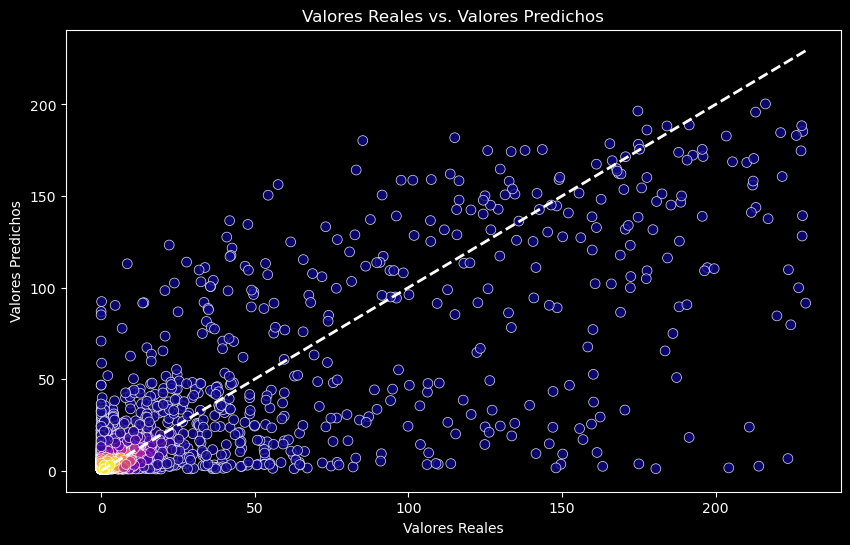

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calcular la densidad de puntos
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# Crear un gráfico de dispersión con color basado en la densidad de puntos
plt.figure(figsize=(10, 6), facecolor='black')
scatter = plt.scatter(y_test, y_pred, c=z, s=50, cmap='plasma', edgecolor='white', alpha=0.8, linewidth=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2)  # Línea de referencia en blanco
plt.xlabel('Valores Reales', color='white')
plt.ylabel('Valores Predichos', color='white')
plt.title('Valores Reales vs. Valores Predichos', color='white')

# Cambiar el color de los ejes y las etiquetas de los ticks
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Cambiar el color del fondo del gráfico
plt.gca().set_facecolor('black')
plt.savefig('real_vs_predicho2.png', facecolor='black')

plt.show()

           Feature  Importance
8             NDBI    0.352065
1              B12    0.306918
25       elevation    0.032894
3               B3    0.032098
6              EVI    0.027163
5               B8    0.026112
26           slope    0.019434
7            MNDWI    0.018182
0              B11    0.016957
17              VV    0.013036
14  VH_Correlation    0.012194
10             RVI    0.011840
20      VV_Entropy    0.011732
15      VH_Entropy    0.011623
19  VV_Correlation    0.011500
24          aspect    0.010863
23      VV_plus_VH    0.010792
2               B2    0.010734
12              VH    0.009903
22     VV_minus_VH    0.008937
4               B4    0.008816
18     VV_Contrast    0.007647
21      VV_Inertia    0.007383
9             NDVI    0.006694
11            SAVI    0.005879
13     VH_Contrast    0.004336
16      VH_Inertia    0.004271


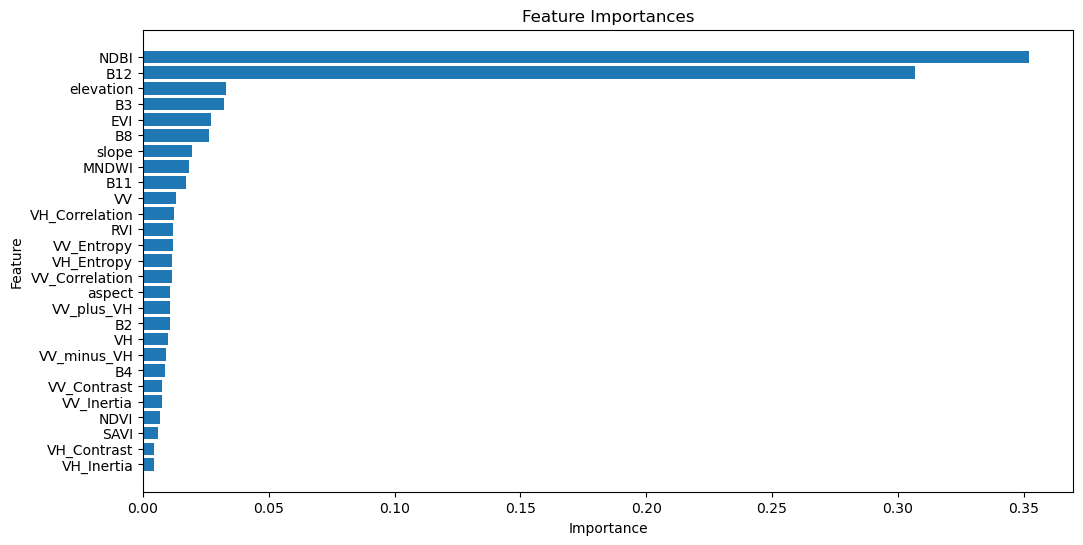

In [56]:
import matplotlib.pyplot as plt
# Obtener la importancia de las características
feature_importances = rf.feature_importances_

# Crear un DataFrame para organizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Mostrar las importancias de las características
print(feature_importances_df)

# Graficar las importancias de las características
plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [57]:
feature_names_reduced = ['B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'EVI', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'SAVI', 'VH', 'VH_Contrast', 'VH_Correlation', 'VH_Entropy', 'VH_Inertia', 'VV', 'VV_Contrast', 'VV_Correlation', 'VV_Entropy', 'VV_Inertia', 'VV_minus_VH', 'VV_plus_VH', 'aspect', 'elevation', 'slope']

# this function also works with the ensemble.ExtraTrees estimator
trees = ml.rf_to_strings(rf, feature_names_reduced,output_mode='regression')

In [20]:
# create a ee classifier to use with ee objects from the trees
ee_classifier = ml.strings_to_classifier(trees)
# ee_classifier.getInfo()

In [58]:
feature_names_reduced = ['B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'EVI', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'SAVI', 'VH', 'VH_Contrast', 'VH_Correlation', 'VH_Entropy', 'VH_Inertia', 'VV', 'VV_Contrast', 'VV_Correlation', 'VV_Entropy', 'VV_Inertia', 'VV_minus_VH', 'VV_plus_VH', 'aspect', 'elevation', 'slope']

# this function also works with the ensemble.ExtraTrees estimator
trees = ml.rf_to_strings(rf, feature_names_reduced,output_mode='regression')

user_id = 'users/facuboladerasgee'
# specify asset id where to save trees
# be sure to change  to your ee user name
asset_id = user_id + "/Rf_AGB_trees-SN-CH"
asset_id
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

In [22]:
def export_model_in_parts(model, feature_names, user_id, base_asset_id, part_size=11):
    trees = ml.rf_to_strings(model, feature_names_reduced, output_mode='regression')
    total_trees = len(trees)
    
    # Dividir los árboles en partes
    for i in range(0, total_trees, part_size):
        part_trees = trees[i:i+part_size]
        part_asset_id = f"{base_asset_id}_part_{i//part_size}"
        
        # Exportar la parte
        ml.export_trees_to_fc(part_trees, part_asset_id)
        print(f"Parte {i//part_size} exportada a {part_asset_id}")

# Ejemplo de uso:
user_id = 'users/facuboladerasgee'
base_asset_id = f"{user_id}/Rf_Malambique"
export_model_in_parts(rf, feature_names_reduced, user_id, base_asset_id)

Parte 0 exportada a users/facuboladerasgee/Rf_Malambique_part_0
Parte 1 exportada a users/facuboladerasgee/Rf_Malambique_part_1
Parte 2 exportada a users/facuboladerasgee/Rf_Malambique_part_2
Parte 3 exportada a users/facuboladerasgee/Rf_Malambique_part_3
Parte 4 exportada a users/facuboladerasgee/Rf_Malambique_part_4
Parte 5 exportada a users/facuboladerasgee/Rf_Malambique_part_5
Parte 6 exportada a users/facuboladerasgee/Rf_Malambique_part_6
Parte 7 exportada a users/facuboladerasgee/Rf_Malambique_part_7
Parte 8 exportada a users/facuboladerasgee/Rf_Malambique_part_8
Parte 9 exportada a users/facuboladerasgee/Rf_Malambique_part_9


In [ ]:
# # Exporta la imagen a Google Cloud Storage
# task = ee.batch.Export.image.toCloudStorage(
#     image=image,
#     description='Sentinel-2_export',
#     bucket='your_bucket_name',  # Reemplaza con el nombre de tu bucket
#     fileNamePrefix='sentinel-2_export',
#     scale=30,
#     region=region,
#     maxPixels=1e13  # Ajusta el límite de píxeles si es necesario
# )

# # Inicia la tarea de exportación
# task.start()

# print('Export task started. Check the GCS bucket for the exported files.')